## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Finding out where to merge the datasets
# mouse_metadata.head()
# study_results.head()

# Combine the data into a single dataset
mouse_study = mouse_metadata.merge(study_results, on = "Mouse ID")

# Display the data table for preview
mouse_study.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# To see the number of data points total in this merged data set
mouse_study.shape

(1893, 8)

In [3]:
# Checking the number of mice by mouse ID
mouse_study["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study[mouse_study.duplicated(subset = ["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    # could maybe group by mouse ID?
without_duplicates = mouse_study.loc[mouse_study["Mouse ID"] != "g989"]
without_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
without_duplicates["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen
    #maybe use df.numeric.describe()
mouse_mean = without_duplicates.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mouse_median = without_duplicates.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
mouse_variance = without_duplicates.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
mouse_sd = without_duplicates.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
mouse_SEM = without_duplicates.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    #groupby Drug Regimine
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
    # just do df["Tumor Volume (mm3)"].describe()
# Assemble the resulting series into a single summary dataframe.
    #set described data frame to be equal to the described df and then call the df
summary_mouse_data = pd.DataFrame({"Mean Tumor Vol (mm3)": mouse_mean, "Median Tumor Vol (mm3)": mouse_median, "Tumor Vol Variance": mouse_variance, 
                                   "Tumor Vol Standard Deviation": mouse_sd, "Tumor Vol SEM": mouse_SEM})
summary_mouse_data

,Mean Tumor Vol (mm3),Median Tumor Vol (mm3),Tumor Vol Variance,Tumor Vol Standard Deviation,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
    #call the previous df?
# Using the aggregation method, produce the same summary statistics in a single line
    
summary_df = without_duplicates.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean',
                                                                                    'median',
                                                                                    'var',
                                                                                    'std', 
                                                                                    'sem'] })
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# summary_df.plot()
regimen_count = without_duplicates.groupby("Drug Regimen").count()["Mouse ID"]
regimen_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

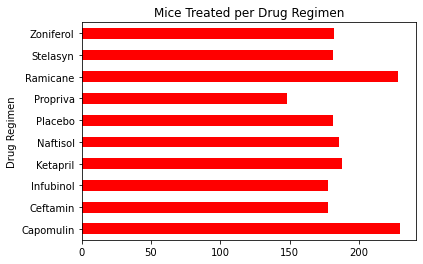

In [10]:
type(regimen_count)
regimen_count.plot(kind= "barh", title = "Mice Treated per Drug Regimen",
                   color = "r");

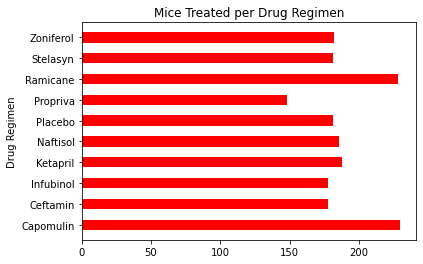

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
barwidth = 0.5
plt.barh(regimen_count.index, regimen_count, height=barwidth, color = "red")
plt.title('Mice Treated per Drug Regimen')
plt.ylabel("Drug Regimen");

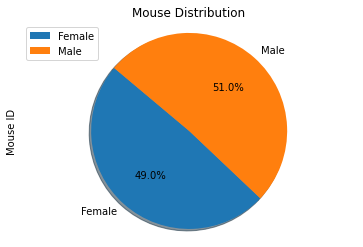

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
amount_gender = without_duplicates.groupby("Sex").count()["Mouse ID"]
# amount_gender // to see what the groupby looked like
amount_gender.plot(kind= "pie", title = "Mouse Distribution", autopct="%1.1f%%", shadow=True, startangle=140,
                   legend = True)
# Create axes which are equal so we have a perfect circle
plt.axis("equal");

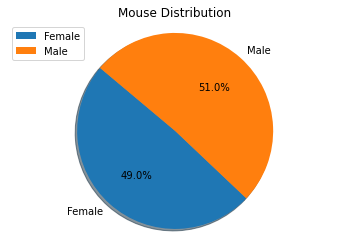

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female', 'Male'
plt.pie(amount_gender, labels= labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.legend(amount_gender.index, loc = "best")
plt.title('Mouse Distribution')

# Create axes which are equal so we have a perfect circle
plt.axis("equal");


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = without_duplicates.groupby("Mouse ID").max()["Timepoint"]
last_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(last_timepoint, without_duplicates, on = ['Mouse ID', 'Timepoint'])
merge_df.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for treatment in treatments:
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    specific_mice = merge_df.loc[merge_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(specific_mice)

tumor_df = pd.concat(tumor_vol)
print(tumor_df.head())

19    38.982878
24    38.939633
61    30.485985
64    37.074024
66    40.159220
Name: Tumor Volume (mm3), dtype: float64


In [17]:
# Determine outliers using upper and lower bounds
quartiles = tumor_df.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lowbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)

print(f'Any value of tumor volume above {upperbound} or below {lowbound} may be an outlier.')

Any value of tumor volume above 94.04403868375002 or below 3.0739668737499812 may be an outlier.


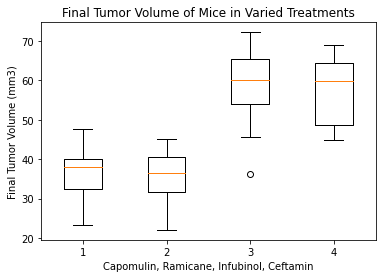

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Mice in Varied Treatments')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel("Capomulin, Ramicane, Infubinol, Ceftamin")

#STILL trying to figure out how to get the x tick labels in properly

ax1.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

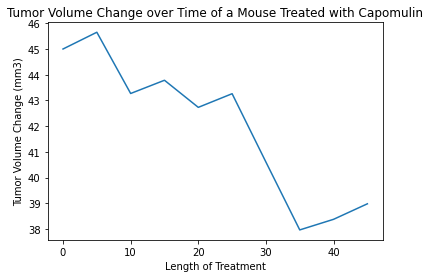

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# pulled 20th index value from the merge_df printed above to get mouse ID [19]
specific_mouse = mouse_study.loc[mouse_study["Mouse ID"] == "b128"]
# specific_mouse // called to be sure I had a mouse on Capomulin 

# Setting the timepoint and tumor volume for specific mice to variables to cast into plot as axes values
mouse_time = specific_mouse["Timepoint"]
mouse_tumvol = specific_mouse["Tumor Volume (mm3)"]

#making line plot
plt.title("Tumor Volume Change over Time of a Mouse Treated with Capomulin")
plt.xlabel("Length of Treatment")
plt.ylabel("Tumor Volume Change (mm3)")
plt.plot(mouse_time, mouse_tumvol)
plt.show()

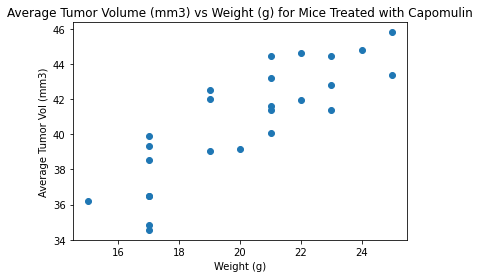

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Cleaning data to only include that which has Capomulin as the Drug Regimen
one_treatment = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin",:]
# one_treatment // called to see what it looked like

# Grouping by mouse ID in order to find the average weight and tumor vol for each mouse individually
averages = one_treatment.groupby(["Mouse ID"]).mean()
# averages // called to see what it looked like

#Making the plot
plt.scatter(averages["Weight (g)"], averages["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Vol (mm3)")
plt.title("Average Tumor Volume (mm3) vs Weight (g) for Mice Treated with Capomulin")
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient
correl_coeff = round(st.pearsonr(averages['Weight (g)'], averages['Tumor Volume (mm3)'])[0],2)
print(f'The correlation between mouse weight in grams and average tumor volume in millimeters cubed is {correl_coeff}.')

The correlation between mouse weight in grams and average tumor volume in millimeters cubed is 0.84.


In [25]:
# linear regression model for mouse weight and average tumor volume for the Capomulin regimen
regression =st.linregress(averages['Weight (g)'], averages['Tumor Volume (mm3)'])
regression

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

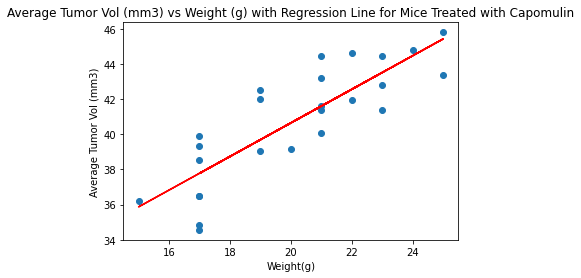

In [26]:
# Copied and pasted values from above and set them as variables to be used in the y axis
slope = 0.9544396890241045
intercept = 21.552160532685015

#Making the plot
y_values = averages['Weight (g)']*slope + intercept
plt.scatter(averages['Weight (g)'], averages['Tumor Volume (mm3)'])
plt.plot(averages['Weight (g)'], y_values ,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Vol (mm3)')
plt.title('Average Tumor Vol (mm3) vs Weight (g) with Regression Line for Mice Treated with Capomulin')
plt.show()

# Data Analysis

Based on the data analyzed in the boxplot, we can infer that the most effective treatments between Capomulin, Ramicane, Infubinol, and Ceftamin are Capomulin and Ramicane; the median and spread of the tumor volume are at lower measured volumes for these treatments. 
The scatter plot clearly shows that for one mouse, as the length in treatment time increased, the tumor volume decreased when treated with Capomulin. This may indicate that the longer a mouse is treated with Capomulin, the more its tumor volume decreases.
The trendline in the linear regression model and the calculated correlation coefficient shows that for mice that were treated with Capomulin, tumor volume was strongly positively correlated to weight (coefficient = 0.82). As weight increased, the tumor volume decreased. Thus, we can reasonably conclude that as weight increases, the effect of Capomulin on tumor volume is diminished. 